# Read FTT Cone Calorimeter Result Files

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
print('Package Versions')
print('----------------')
print('Pandas version: {}'.format(pd.__version__))
print('Numpy version: {}'.format(np.__version__))
print('Matplotlib version: {}'.format(matplotlib.__version__))

Package Versions
----------------
Pandas version: 0.22.0
Numpy version: 1.14.0
Matplotlib version: 2.1.2


In [3]:
cwd = os.getcwd()
print(cwd)

D:\Git\UsefulStuff\LabEquipment\ConeFTT


In [6]:
# Define general information needed within this notebook.

# Location of experimental data files.
exp_data_dir = os.path.join("ExperimentalData", 
                            "16060023_red_V44.csv")


# Read the Files

The special symbols used in the files are somewhat annoying. Thus, they are removed in the following block, before further steps are taken for any data analysis.

In [50]:
# Read a single line of the csv file to extract the column labels as a list.
column_labels_original=list(pd.read_csv(exp_data_dir, delimiter="\t", encoding='cp1250', 
                   header=1, nrows=1))#usecols=[0,1])

column_labels = list()
# Remove the squared symbol.
for i, val in enumerate(column_labels_original):
    if "˛" in val:
        column_labels.append(val.replace("˛", "2"))
    else:
        column_labels.append(val)

# Remove the multiplication (dot) symbol.
for i, val in enumerate(column_labels):    
    if "·" in val:
        column_labels[i]=val.replace("·", "")

In [51]:
# Column labels as provided within the csv file.
column_labels_original

['Parameter',
 'Value',
 'Time (s)',
 'HRR (kW/m˛)',
 'THR (MJ/m˛)',
 'Specimen mass (g)',
 'MLR (g/s)',
 'Specific MLR (g/m˛·s)',
 'EHC (MJ/kg)',
 'ARHE(kW/m˛)']

In [52]:
# Adjusted column labels for better usage.
column_labels

['Parameter',
 'Value',
 'Time (s)',
 'HRR (kW/m2)',
 'THR (MJ/m2)',
 'Specimen mass (g)',
 'MLR (g/s)',
 'Specific MLR (g/m2s)',
 'EHC (MJ/kg)',
 'ARHE(kW/m2)']

In [49]:
# Read first part of the data, the parameter overview.
parameters = pd.read_csv(exp_data_dir, delimiter="\t", encoding='cp1250', header=1, 
                         usecols=column_labels_original[:2]).dropna(how='all')

parameters

,Parameter,Value
0,Peaks,NaN
1,peak HRR (kW/m˛),0.000000
2,peak EHC (MJ/kg),0.000000
3,peak MLR (g/s),1.090359
5,Time To Peaks,NaN
6,t peak HRR (s),13.000000
7,t peak EHC (s),13.000000
8,t peak MLR (s),245.000000
10,Test Results (between 13 and 617 s),NaN
11,mean HRR (kW/m˛),0.000000


In [57]:
# Read the second part, the different data series.
exp_data = pd.read_csv(exp_data_dir, delimiter="\t", encoding='cp1250',
                       header=1, usecols=column_labels_original[2:])

# Renaming columns.
for i_orig, orig_label in enumerate(column_labels_original):
    exp_data.rename(columns={orig_label: column_labels[i_orig]}, inplace=True)

# Provide overview over the data.
exp_data.head()

,Time (s),HRR (kW/m2),THR (MJ/m2),Specimen mass (g),MLR (g/s),Specific MLR (g/m2s),EHC (MJ/kg),ARHE(kW/m2)
0,0,0,0,215.120000,-2.126226,-212.622642,0,0
1,1,0,0,216.145507,-0.263909,-26.390925,0,0
2,2,0,0,216.146172,0.103347,10.334742,0,0
3,3,0,0,216.077386,0.185119,18.511892,0,0
4,4,0,0,215.815201,0.203479,20.347875,0,0


Text(0,0.5,'Specimen mass (g)')

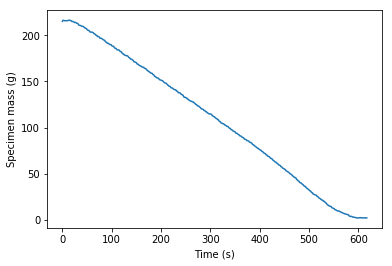

In [64]:
# Little plot for fun...

# Note: Column labels as string can be used to query colums.
x_data = "Time (s)"
y_data = "Specimen mass (g)"

# Prepare the plot.
plt.plot(exp_data[x_data], 
         exp_data[y_data])

plt.xlabel(x_data)
plt.ylabel(y_data)